### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os

Pandas read data. Each index is stored in a csv derived from yahoo finance

In [2]:
#Import Data from CSV into Pandas Dataframes

#Dow Jones Industrial Average NYSE
DJI = pd.read_csv('IndexHistory/DJI.csv')
#EuroNext100 Euronext Stock Exchange
N100 = pd.read_csv('IndexHistory/N100.csv')
#Hang Seng Index Hogn Kong Stock Exchange
HSI = pd.read_csv('IndexHistory/HSI.csv')
#Nikkei225 Index, Nikkei Stock Exchange
N225 = pd.read_csv('IndexHistory/N225.csv')

In [3]:
DJI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5031 entries, 0 to 5030
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5031 non-null   object 
 1   Open       5031 non-null   float64
 2   High       5031 non-null   float64
 3   Low        5031 non-null   float64
 4   Close      5031 non-null   float64
 5   Adj Close  5031 non-null   float64
 6   Volume     5031 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 275.3+ KB


'Date' column is object datatype, must convert to datetime64 using pd.to_datetime()
Repeat for all four dataframes

In [4]:
DJI['Date'] = pd.to_datetime(DJI['Date'], format='%Y-%m-%d')
N100['Date'] = pd.to_datetime(N100['Date'], format='%Y-%m-%d')
HSI['Date'] = pd.to_datetime(HSI['Date'], format='%Y-%m-%d')
N225['Date'] = pd.to_datetime(N225['Date'], format='%Y-%m-%d')

Double check datetime worked

In [5]:
DJI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5031 entries, 0 to 5030
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5031 non-null   datetime64[ns]
 1   Open       5031 non-null   float64       
 2   High       5031 non-null   float64       
 3   Low        5031 non-null   float64       
 4   Close      5031 non-null   float64       
 5   Adj Close  5031 non-null   float64       
 6   Volume     5031 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 275.3 KB


Running through some basic sanity checks

In [6]:
DJI.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-10-09,10596.910156,10641.309570,10546.230469,10568.429688,10568.429688,167770000
1,2000-10-10,10569.169922,10623.549805,10488.889648,10524.400391,10524.400391,212070000
2,2000-10-11,10521.070313,10566.580078,10350.889648,10413.790039,10413.790039,324520000
3,2000-10-12,10424.139648,10460.400391,10023.490234,10034.580078,10034.580078,367130000
4,2000-10-13,10031.620117,10208.089844,10014.240234,10192.179688,10192.179688,300410000
5,2000-10-16,10184.780273,10272.089844,10177.759766,10238.799805,10238.799805,270220000
6,2000-10-17,10242.870117,10293.919922,10026.450195,10089.709961,10089.709961,253140000
7,2000-10-18,10085.990234,10085.990234,9654.639648,9975.019531,9975.019531,372410000
8,2000-10-19,10014.610352,10142.980469,10014.610352,10142.980469,10142.980469,343710000
9,2000-10-20,10141.129883,10229.549805,10067.509766,10226.589844,10226.589844,319750000


In [7]:
DJI.shape, N100.shape, HSI.shape, N225.shape

((5031, 7), (5140, 7), (4999, 7), (5012, 7))

In [8]:
DJI.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

We will use this data to perform analysis on the closing prices of each index. The best way to do this is to compare percentage changes. We will calculate the closing price's percent change from previous close.

In [9]:
#Use pct_change() method to calculate percentage for 'Close' column
#pct_change isnt out of 100, rather it returns a decimal value, so multiply by 100 after the fact
DJI['Percent Change'] = DJI['Close'].pct_change() * 100
N100['Percent Change'] = N100['Close'].pct_change() * 100
HSI['Percent Change'] = HSI['Close'].pct_change() * 100
N225['Percent Change'] = N225['Close'].pct_change() * 100

For best analysis, datasets must be merged. But before we can do that, we must still differentiate what each row's index represents. To achieve this, we will insert an extra column and populate it with the name of the corresponding index.

In [10]:
####Insert index name as new column
DJI['Index'] = 'Dow Jones Industrial'
N100['Index'] = 'Euronext100'
HSI['Index'] = 'Hang Seng'
N225['Index'] = 'Nikkei 225'

Sanity check

In [11]:
DJI.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change,Index
0,2000-10-09,10596.910156,10641.309570,10546.230469,10568.429688,10568.429688,167770000,NaN,Dow Jones Industrial
1,2000-10-10,10569.169922,10623.549805,10488.889648,10524.400391,10524.400391,212070000,-0.416612,Dow Jones Industrial
2,2000-10-11,10521.070313,10566.580078,10350.889648,10413.790039,10413.790039,324520000,-1.050990,Dow Jones Industrial
3,2000-10-12,10424.139648,10460.400391,10023.490234,10034.580078,10034.580078,367130000,-3.641421,Dow Jones Industrial
4,2000-10-13,10031.620117,10208.089844,10014.240234,10192.179688,10192.179688,300410000,1.570565,Dow Jones Industrial


In [12]:
DJI.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change,Index
5026,2020-10-01,27940.630859,28041.460938,27669.259766,27816.900391,27816.900391,373450000,0.126706,Dow Jones Industrial
5027,2020-10-02,27536.390625,27861.429688,27382.939453,27682.810547,27682.810547,392770000,-0.482045,Dow Jones Industrial
5028,2020-10-05,27825.419922,28162.640625,27825.419922,28148.640625,28148.640625,318210000,1.682741,Dow Jones Industrial
5029,2020-10-06,28214.240234,28354.480469,27728.029297,27772.759766,27772.759766,435030000,-1.335343,Dow Jones Industrial
5030,2020-10-07,27971.359375,28369.660156,27971.359375,28303.460938,28303.460938,328750000,1.910869,Dow Jones Industrial


Percent change inherently will not have a value with the first row. Since Percent Change will become the basis of our modeling, it must be dropped. 

While working with NaN values, check how many exist throughout the datasets.

Check for null values

In [13]:
print(pd.isna(DJI).sum(), pd.isna(N100).sum(), pd.isna(N225).sum(), pd.isna(HSI).sum())

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Percent Change    1
Index             0
dtype: int64 Date               0
Open              32
High              32
Low               32
Close             32
Adj Close         32
Volume            32
Percent Change     1
Index              0
dtype: int64 Date                0
Open              115
High              115
Low               115
Close             115
Adj Close         115
Volume            115
Percent Change      1
Index               0
dtype: int64 Date               0
Open              73
High              73
Low               73
Close             73
Adj Close         73
Volume            73
Percent Change     1
Index              0
dtype: int64


Isna sum divided by len of dataframes to obtain the percentage of missing values relative to the datasets

In [14]:
(pd.isna(DJI).sum() + pd.isna(N100).sum() + pd.isna(N225).sum() + pd.isna(HSI).sum()) / (len(DJI) + len(N100) + len(N225) + len(HSI))

Date              0.000000
Open              0.010901
High              0.010901
Low               0.010901
Close             0.010901
Adj Close         0.010901
Volume            0.010901
Percent Change    0.000198
Index             0.000000
dtype: float64

Missing Values constitute around 10.9% of all values. Keeping around 90% of the data after dropping missing value rows feels acceptable.

But first, drop the first row of the datasets due to NaN Percent Change

In [15]:
DJI.drop(DJI.index[0], inplace=True)
N100.drop(N100.index[0], inplace=True)
HSI.drop(HSI.index[0], inplace=True)
N225.drop(N225.index[0], inplace=True)

In [16]:
DJI.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change,Index
1,2000-10-10,10569.169922,10623.549805,10488.889648,10524.400391,10524.400391,212070000,-0.416612,Dow Jones Industrial
2,2000-10-11,10521.070313,10566.580078,10350.889648,10413.790039,10413.790039,324520000,-1.050990,Dow Jones Industrial
3,2000-10-12,10424.139648,10460.400391,10023.490234,10034.580078,10034.580078,367130000,-3.641421,Dow Jones Industrial
4,2000-10-13,10031.620117,10208.089844,10014.240234,10192.179688,10192.179688,300410000,1.570565,Dow Jones Industrial
5,2000-10-16,10184.780273,10272.089844,10177.759766,10238.799805,10238.799805,270220000,0.457411,Dow Jones Industrial


In [17]:
N225.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change,Index
5007,2020-10-02,23294.800781,23365.580078,22951.410156,23029.900391,23029.900391,86300.0,-0.668664,Nikkei 225
5008,2020-10-05,23254.279297,23377.429688,23252.689453,23312.140625,23312.140625,59500.0,1.225538,Nikkei 225
5009,2020-10-06,23420.070313,23441.160156,23331.400391,23433.730469,23433.730469,57700.0,0.521573,Nikkei 225
5010,2020-10-07,23272.449219,23432.730469,23272.449219,23422.820313,23422.820313,52100.0,-0.046557,Nikkei 225
5011,2020-10-08,23272.449219,23701.769531,23477.730469,23647.070313,23647.070313,0.0,0.957400,Nikkei 225


Index Needs to be reset due to dropped first row

In [18]:
DJI.reset_index(inplace=True, drop=True)
N100.reset_index(inplace=True, drop=True)
HSI.reset_index(inplace=True, drop=True)
N225.reset_index(inplace=True, drop=True)

In [19]:
DJI.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change,Index
0,2000-10-10,10569.169922,10623.549805,10488.889648,10524.400391,10524.400391,212070000,-0.416612,Dow Jones Industrial
1,2000-10-11,10521.070313,10566.580078,10350.889648,10413.790039,10413.790039,324520000,-1.050990,Dow Jones Industrial
2,2000-10-12,10424.139648,10460.400391,10023.490234,10034.580078,10034.580078,367130000,-3.641421,Dow Jones Industrial
3,2000-10-13,10031.620117,10208.089844,10014.240234,10192.179688,10192.179688,300410000,1.570565,Dow Jones Industrial
4,2000-10-16,10184.780273,10272.089844,10177.759766,10238.799805,10238.799805,270220000,0.457411,Dow Jones Industrial


Plot all datasets as a sanity check and view any visual trend on the Closing prices.

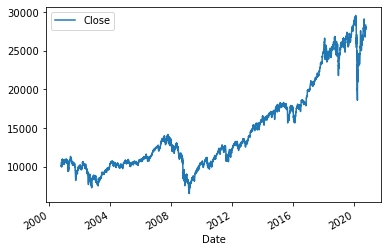

In [20]:
DJI_Plot = DJI.plot(kind = 'line', x = 'Date', y = 'Close')

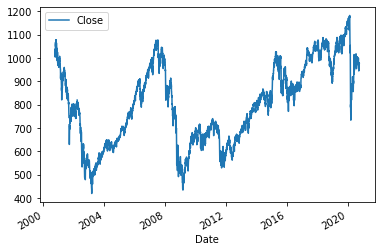

In [21]:
N100_Plot = N100.plot(kind = 'line', x = 'Date', y = 'Close')

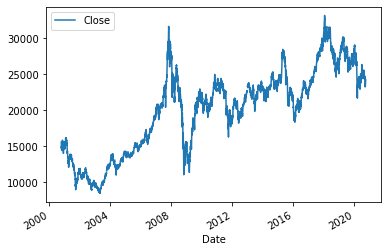

In [22]:
HSI_Plot = HSI.plot(kind = 'line', x = 'Date', y = 'Close')

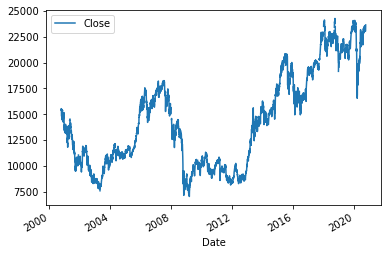

In [23]:
N225_Plot = N225.plot(kind = 'line', x = 'Date', y = 'Close')

All four plots merged nominally

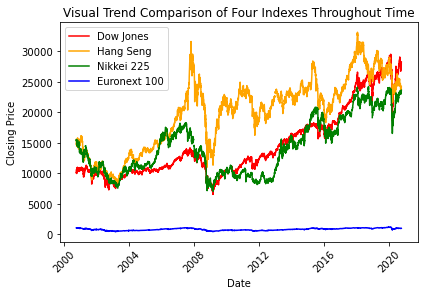

In [24]:
plt.plot(DJI['Date'], DJI['Close'], color='red', label='Dow Jones')
plt.plot(HSI['Date'], HSI['Close'], color='orange', label='Hang Seng')
plt.plot(N225['Date'], N225['Close'], color='green', label='Nikkei 225')
plt.plot(N100['Date'], N100['Close'], color='blue', label='Euronext 100')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Visual Trend Comparison of Four Indexes Throughout Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Now its time to merge the datasets.

In [24]:
Merged_df = [DJI, N100, HSI, N225]

In [25]:
All_exchanges = pd.concat(Merged_df, join='inner')

In [26]:
All_exchanges.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change,Index
0,2000-10-10,10569.169922,10623.549805,10488.889648,10524.400391,10524.400391,212070000.0,-0.416612,Dow Jones Industrial
1,2000-10-11,10521.070313,10566.580078,10350.889648,10413.790039,10413.790039,324520000.0,-1.050990,Dow Jones Industrial
2,2000-10-12,10424.139648,10460.400391,10023.490234,10034.580078,10034.580078,367130000.0,-3.641421,Dow Jones Industrial
3,2000-10-13,10031.620117,10208.089844,10014.240234,10192.179688,10192.179688,300410000.0,1.570565,Dow Jones Industrial
4,2000-10-16,10184.780273,10272.089844,10177.759766,10238.799805,10238.799805,270220000.0,0.457411,Dow Jones Industrial
5,2000-10-17,10242.870117,10293.919922,10026.450195,10089.709961,10089.709961,253140000.0,-1.456126,Dow Jones Industrial
6,2000-10-18,10085.990234,10085.990234,9654.639648,9975.019531,9975.019531,372410000.0,-1.136707,Dow Jones Industrial
7,2000-10-19,10014.610352,10142.980469,10014.610352,10142.980469,10142.980469,343710000.0,1.683816,Dow Jones Industrial
8,2000-10-20,10141.129883,10229.549805,10067.509766,10226.589844,10226.589844,319750000.0,0.824308,Dow Jones Industrial
9,2000-10-23,10230.290039,10361.250000,10216.230469,10271.719727,10271.719727,339180000.0,0.441299,Dow Jones Industrial


In [27]:
All_exchanges.shape

(20178, 9)

The data is unsorted by date. We must sort the values as well as reset the index due to duplicate index numbers

In [28]:
All_exchanges.sort_values(by = ['Date','Index'], inplace=True)

In [29]:
All_exchanges.reset_index(inplace=True, drop=True)

Sanity check

In [30]:
All_exchanges.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change,Index
0,2000-10-10,10569.169922,10623.549805,10488.889648,10524.400391,10524.400391,212070000.0,-0.416612,Dow Jones Industrial
1,2000-10-10,1036.500000,1036.500000,1036.500000,1036.500000,1036.500000,0.0,0.408801,Euronext100
2,2000-10-10,15739.389648,15739.389648,15434.740234,15554.110352,15554.110352,0.0,-0.888200,Hang Seng
3,2000-10-11,10521.070313,10566.580078,10350.889648,10413.790039,10413.790039,324520000.0,-1.050990,Dow Jones Industrial
4,2000-10-11,1009.489990,1009.489990,1009.489990,1009.489990,1009.489990,0.0,-2.605886,Euronext100
5,2000-10-11,15376.620117,15376.620117,15073.950195,15127.000000,15127.000000,0.0,-2.745965,Hang Seng
6,2000-10-11,15795.150391,15795.150391,15424.709961,15513.570313,15513.570313,0.0,-1.984805,Nikkei 225
7,2000-10-12,10424.139648,10460.400391,10023.490234,10034.580078,10034.580078,367130000.0,-3.641421,Dow Jones Industrial
8,2000-10-12,1015.780029,1015.780029,1015.780029,1015.780029,1015.780029,0.0,0.623091,Euronext100
9,2000-10-12,15071.919922,15244.650391,14883.320313,15074.799805,15074.799805,0.0,-0.345080,Hang Seng


In [31]:
All_exchanges['Index'].unique()

array(['Dow Jones Industrial', 'Euronext100', 'Hang Seng', 'Nikkei 225'],
      dtype=object)

In [32]:
All_exchanges.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Percent Change,Index
20168,2020-10-05,23254.279297,23377.429688,23252.689453,23312.140625,23312.140625,5.950000e+04,1.225538,Nikkei 225
20169,2020-10-06,28214.240234,28354.480469,27728.029297,27772.759766,27772.759766,4.350300e+08,-1.335343,Dow Jones Industrial
20170,2020-10-06,977.750000,983.700012,971.280029,979.080017,979.080017,2.466716e+08,0.392722,Euronext100
20171,2020-10-06,23895.210938,24005.029297,23842.250000,23980.650391,23980.650391,1.325452e+09,0.895629,Hang Seng
20172,2020-10-06,23420.070313,23441.160156,23331.400391,23433.730469,23433.730469,5.770000e+04,0.521573,Nikkei 225
20173,2020-10-07,27971.359375,28369.660156,27971.359375,28303.460938,28303.460938,3.287500e+08,1.910869,Dow Jones Industrial
20174,2020-10-07,979.710022,983.119995,974.849976,978.059998,978.059998,2.322297e+08,-0.104181,Euronext100
20175,2020-10-07,23999.789063,24243.910156,23905.419922,24242.859375,24242.859375,1.537076e+09,1.093419,Hang Seng
20176,2020-10-07,23272.449219,23432.730469,23272.449219,23422.820313,23422.820313,5.210000e+04,-0.046557,Nikkei 225
20177,2020-10-08,23272.449219,23701.769531,23477.730469,23647.070313,23647.070313,0.000000e+00,0.957400,Nikkei 225


The merged dataset inherited all the NaN values. It is easier to run the dropna command on a single merged dataset than earlier with four separate dataframes.

In [33]:
All_exchanges.isnull().sum()

Date                0
Open              220
High              220
Low               220
Close             220
Adj Close         220
Volume            220
Percent Change      0
Index               0
dtype: int64

In [34]:
All_exchanges = All_exchanges.dropna()

In [35]:
All_exchanges.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Percent Change    0
Index             0
dtype: int64

Time to save the new cleaned dataframe to a csv

In [41]:
datapath = 'data'
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [42]:
datapath_all_exchanges = os.path.join(datapath, 'all_exchanges_data_cleaned.csv')
if not os.path.exists(datapath_all_exchanges):
    All_exchanges.to_csv(datapath_all_exchanges, index=False)